## 1. Análise Exploratória

Nessa primeira parte iremos realizar a leitura dos dados e uma análise exploratória da distribuição de nossas variáveis, sua correlação e trabalhar um pouco sobre nosso dataset.

#### Importando bibliotecas iniciais

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

#### Lendo o dataset

In [2]:
dataset = pd.read_csv('datasets/creditcard.csv')
pd.options.display.max_columns = 40
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Passando os olhos sobre nosso dataset podemos notar algumas coisas.

Como podemos ver, a maioria de nossas features não são identificadas e nem mesmo podemos fazer um palpite do que seriam, pois seus valores parecem estar em alguma escala não identificada. Isso é comum em alguns datasets, uma vez que estes dados são confidenciais e dizem muito sobre o business e a estratégia de uma empresa.

Apesar disso, algumas colunas têm nomes que permitem identificarmos estas, que são a coluna <i>Time, Amount</i> e <i>Class</i>.

A coluna <i>Time</i> diz respeito ao tempo de transação em cada uma das operações representadas pelas linhas, <i>amount</i> é a quantidade movida em tal transação e <i>Class</i> é a coluna que queremos prever, nosso <i>target</i>, sendo 1 no caso em que é uma fraude e 0 no caso em que não é.

Você pode visualizar abaixo algumas informações sobre nosso dataset. As informações mais valiosas para nós são o tipo de nossas features e a quantidade de elementos não nulos.

Se nossas features não fossem numéricas, teríamos que fazer um trabalho de codificá-las e, se houvessem dados faltando, teríamos que escolher uma estratégia apropriada para lidar com estes. Para nossa sorte, nenhuma das situações aconteceu.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Reduzindo nosso dataset

Vamos visualizar agora a distribuição das minhas amostras entre as duas classes de target.

In [4]:
dataset['Class'].value_counts(True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

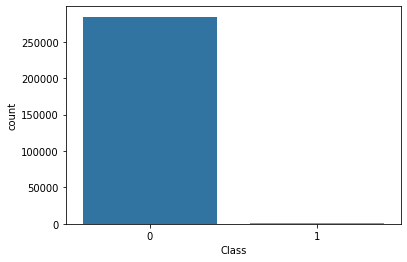

In [5]:
sns.countplot(dataset['Class'])

Perceba que o número de indivíduos na classe 1 (ou seja, que foram identificados como fradulentos) corresponde a menos do que 1% do meu dataset.

Agora, precisamos corrigir a diferença entre o número de indivíduos em cada classe. Do contrário, nosso modelo irá entregar uma falsa acurácia alta. Imagine que 90% de nossas amostras fossem da classe 0, um modelo que chutasse que todos são da classe 0 teria 90% de acurácia, mas não estaria fazendo nenhuma previsão sobre os meus dados. Por isso, precisamos trabalhar sobre um dataset balanceado entre as duas classes. Verifique o que aconteceria do contrário:

In [6]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.9990519995786665


In [10]:
cm

array([[56830,    34],
       [   20,    78]])

Nosso modelo teve uma acurácia de 99.9%! Parece perfeito... mas o que deveríamos estar interessados em calcular é o recall de nosso modelo, que é de apenas 70%. Se esse valor é bom ou ruim depende muito da aplicação que faremos, aqui, como queremos prever transações fraudulentas, é ideal que maximizemos esse valor tanto quanto possível.

Para entendermos isso, façamos uma breve introdução ao conceito de <i><b>Recall</b></i>. Veja a tabela a seguir:

<img src="https://miro.medium.com/max/938/1*s7VB26Cfo1LdVZcLou-e0g.png" width=469 height=163>

Essa é uma tabela dos possíveis valores que recebemos como output de nosso modelo versus o valor real daquela amostra. No nosso caso, a pergunta que estamos fazendo é: "dado essas variáveis, essa transação foi fraudulenta ou não?".

Caso meu modelo diga que sim e ela realmente for, dizemos que ele acertou e isso é <b>Verdadeiro Positivo (VP)</b>, caso ela não seja, ele nos deu um output positivo para a pergunta, mas que não se concretiza na realidade, caracterizando um <b>Falso Positivo (FP)</b>. Agora, na situação em que nosso modelo deu uma resposta negativa invertemos os conceitos. Ou seja, se de acordo com a realidade, temos um <b>Verdadeiro Negativo (VN)</b> e do contrário um <b>Falso Negativo (FN)</b>. Fácil de pegar, certo?

Nesse contexto, surge o conceito de Recall.

Da mesma forma que minha acurácia representa um quociente (nesse caso, de acertos sobre tentativas totais) o Recall é o quociente do número de acertos do meu modelo considerando apenas as amostras confirmadas como positivas. Ou seja:


$$Recall = \frac{VP}{VP + FN}$$


Essa métrica é muito importante pois não estamos interessados apenas em saber quantas previsões acertamos, mas quantas acertamos dentre a nossa classe de maior interesse (saber se uma transação é fraudulenta).

Vamos então reduzir nosso dataset de modo a balancearmos a distribuição entre as classes.

In [11]:
# vamos criar subdatasets compostos apenas por amostras de uma classe
target_1 = dataset[dataset['Class'] == 1]
target_0 = dataset[dataset['Class'] == 0]

# vamos pegar, randomicamente (afim de evitar qualquer viés de ordenação), um número de amostras do meu dataset maior
# igual ao número de amostras do meu dataset menor
target_0_aux = target_0.sample(n=target_1.shape[0], random_state=42)
target_1_aux = target_1.copy()

# por fim, vamos concatenar esses subdatasets e visualizar a nova distribuição de classes
reduced_dataset = pd.concat([target_0_aux, target_1_aux])
reduced_dataset = reduced_dataset.sample(frac=1).reset_index(drop=True)
reduced_dataset['Class'].value_counts(True)

1    0.5
0    0.5
Name: Class, dtype: float64

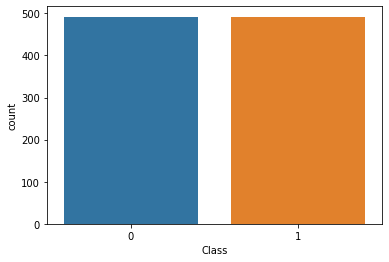

In [12]:
sns.countplot(reduced_dataset['Class'])

Agora nosso novo dataset está perfeitamente balanceado!

#### Plotagem de gráficos e análise das distribuições

Vamos visualizar agora a distribuição de nossas variáveis entre nossas classes.

In [13]:
# definimos uma função para realizar esse plot
def plot_distribution(df0, df1, label0, label1, feature_list):
    sns.set_style('darkgrid')

    for feature in feature_list:
        sns.distplot(df0[feature], hist=False,label=label0)
        sns.distplot(df1[feature], hist=False,label=label1)
        plt.show()

In [14]:
# criamos de novo dois subsets para cada classe
dataset_0 = reduced_dataset.loc[reduced_dataset['Class'] == 0]
dataset_1 = reduced_dataset.loc[reduced_dataset['Class'] == 1]

# escolhemos as variáveis que queremos analisar
features = list(reduced_dataset.columns)
features.remove('Class')

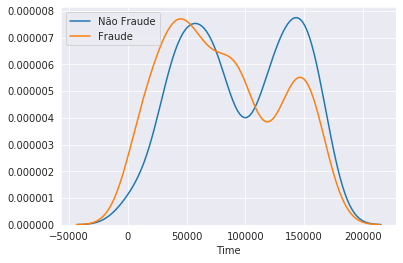

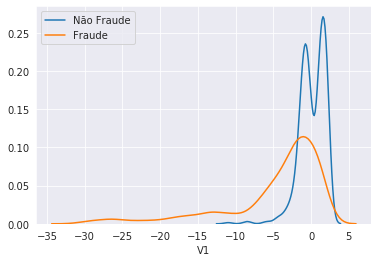

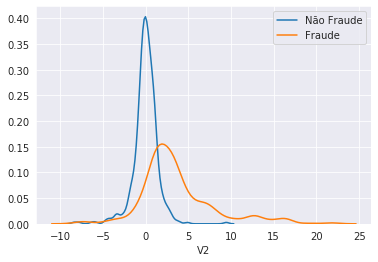

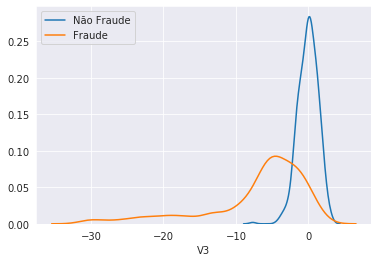

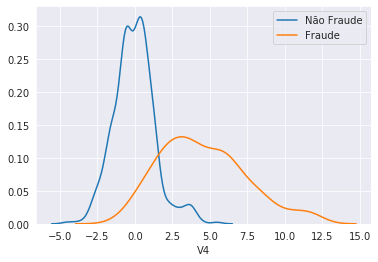

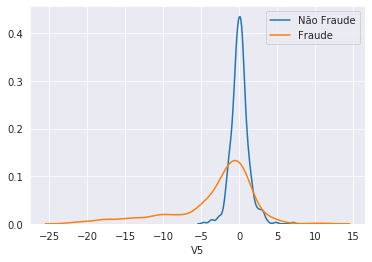

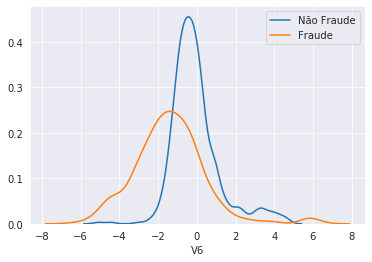

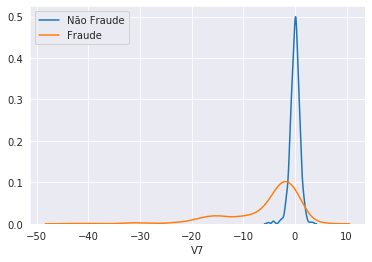

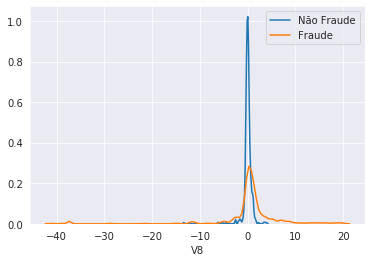

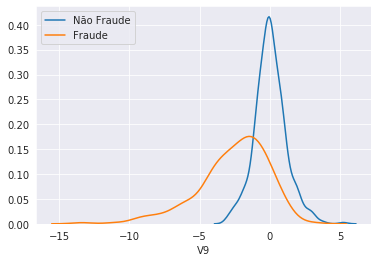

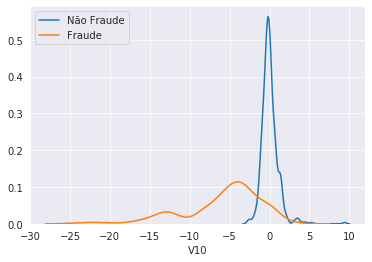

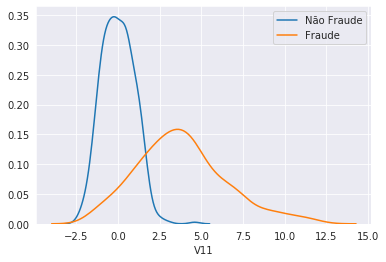

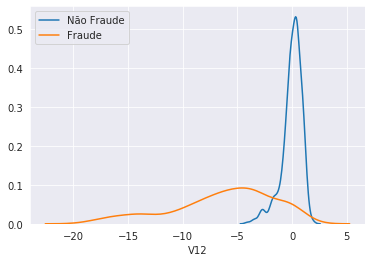

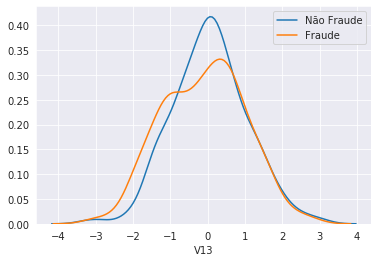

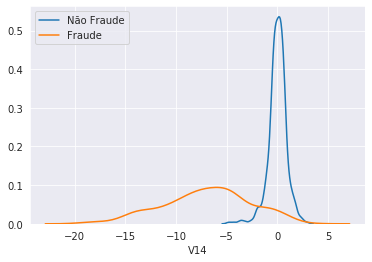

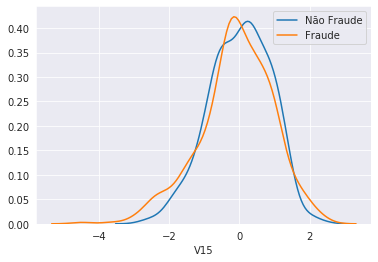

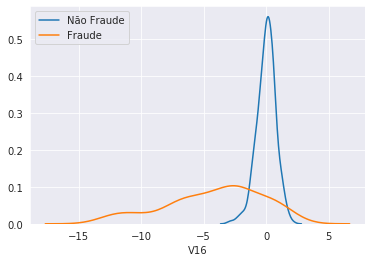

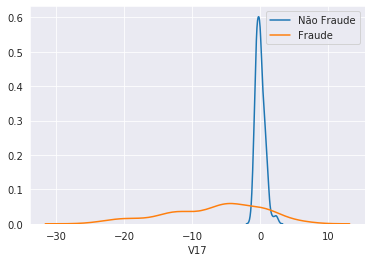

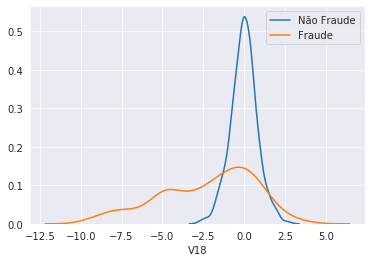

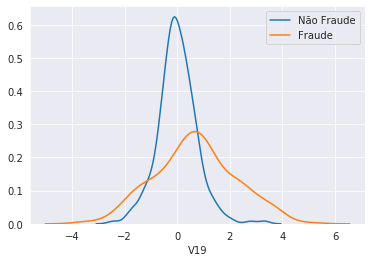

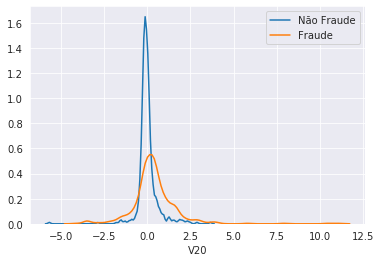

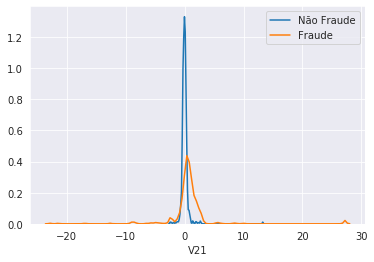

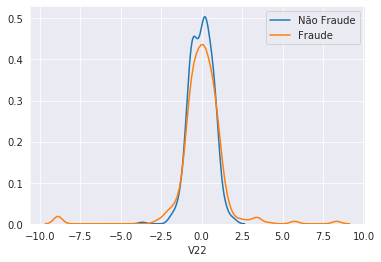

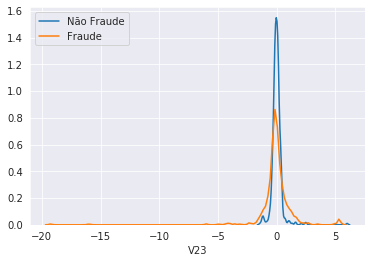

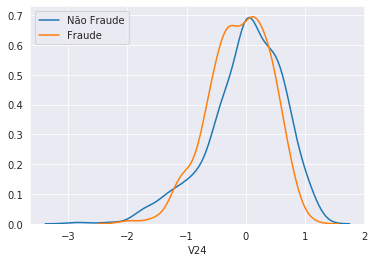

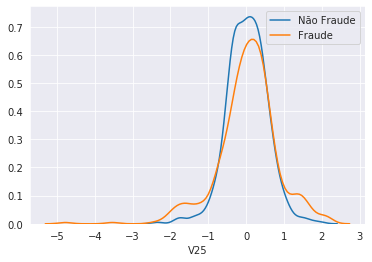

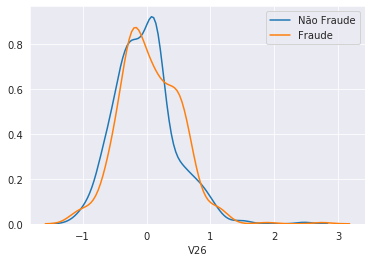

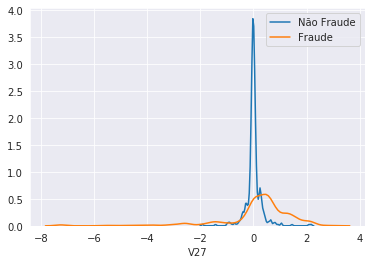

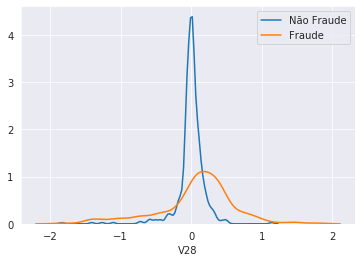

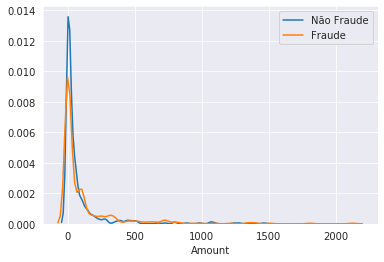

In [15]:
plot_distribution(dataset_0, dataset_1,'Não Fraude', 'Fraude', features)

Vamos também visualizar essa distribuição no nosso dataset original, para garantir que nossa decisão não prejudicou a análise dos dados.

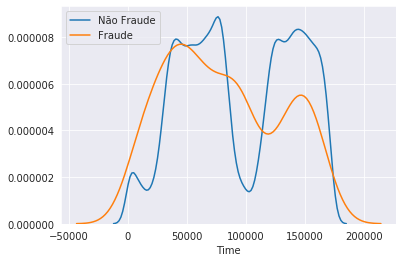

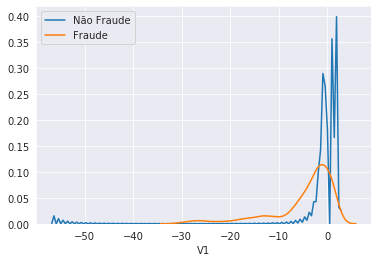

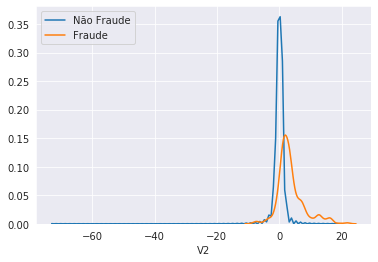

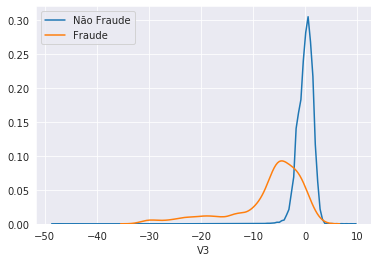

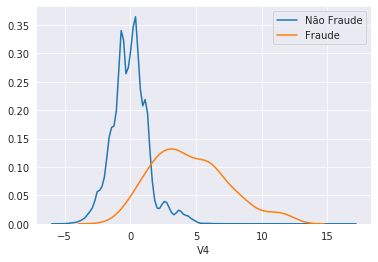

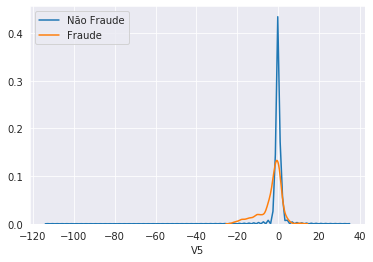

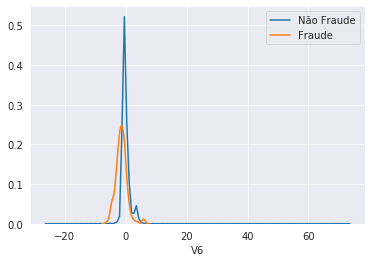

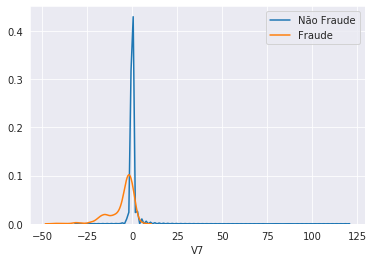

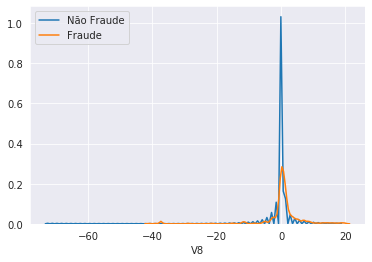

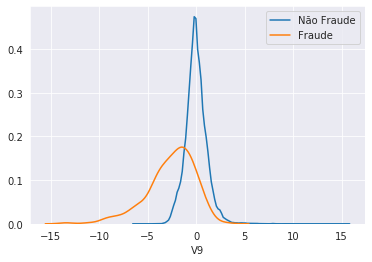

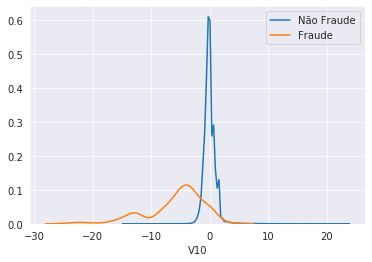

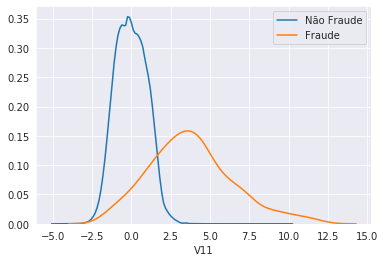

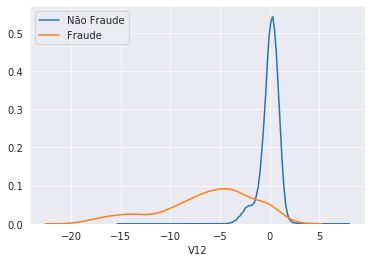

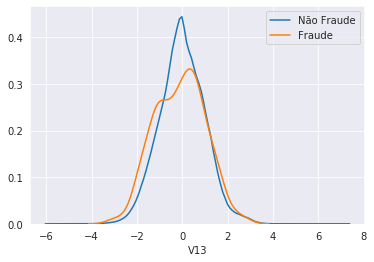

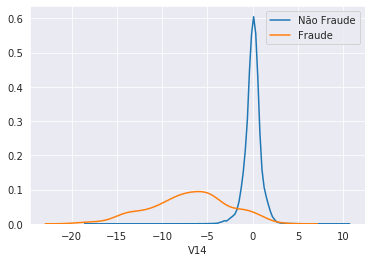

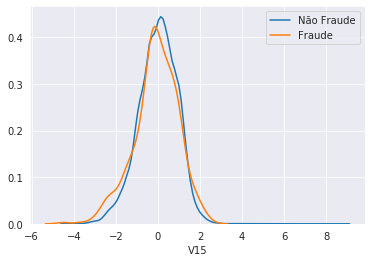

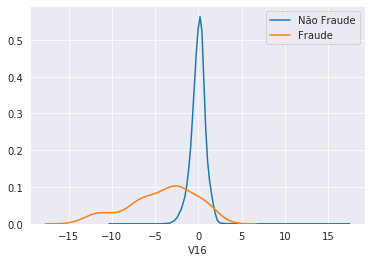

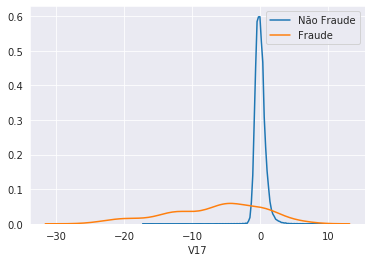

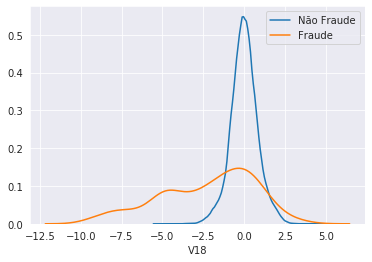

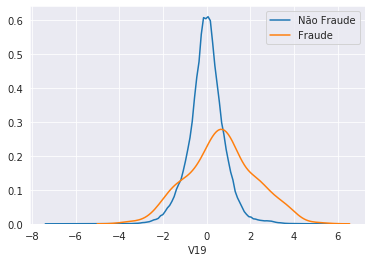

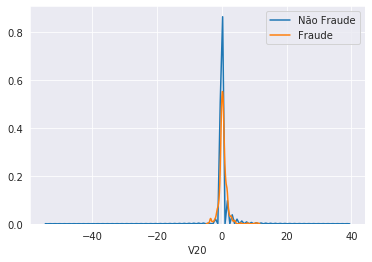

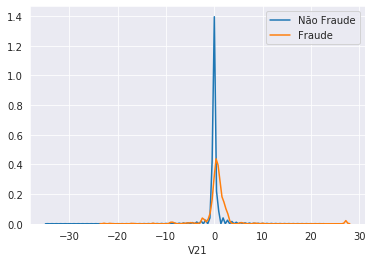

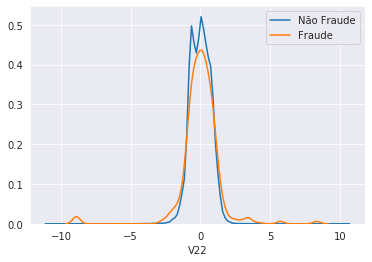

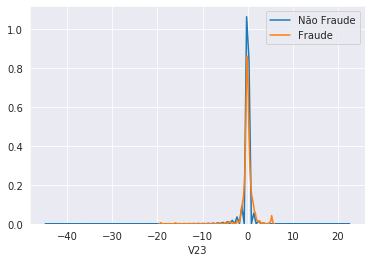

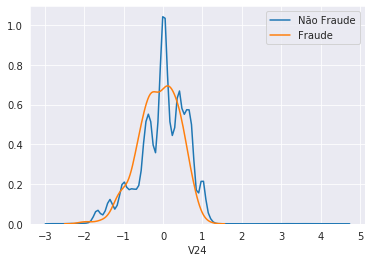

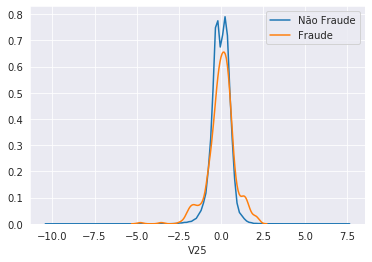

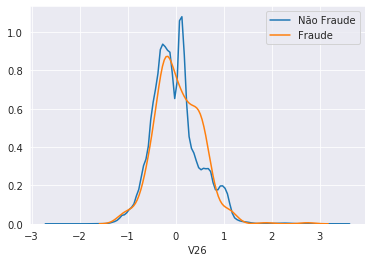

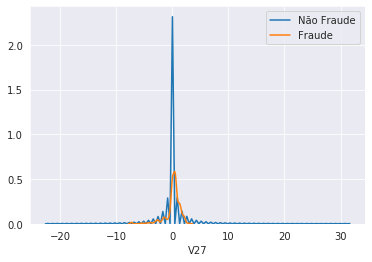

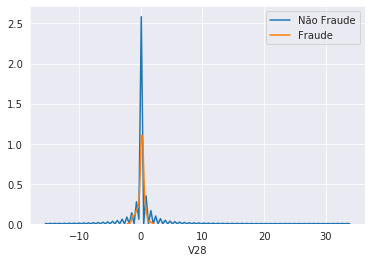

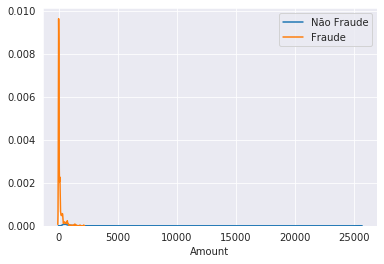

In [16]:
plot_distribution(target_0, target_1,'Não Fraude', 'Fraude', features)

Perceba que nossa escolha não prejudicou em muita coisa a distribuição dos meus dados, o que indica que podemos usá-la sem muito prejuízo.

Perceba a diferença entre a distribuição dos meus dados de fraude e de não fraude. Os dados de fraude costumam distribuir-se mais ao longo do meu eixo do que os dados de não fraude, que costumam se concentrar próximos à média. Isso é esperado, já que uma transação que foge dos padrões na maioria das features realmente deve ser um outlier ou uma exceção, no nosso caso, uma fraude.

Já as features que têm distribuição semelhante em ambas as classes, como V15, V26, Time e outras devem ter uma significância menor para prever minha classe. Vamos conferir se nossa previsão é certa mais a frente.

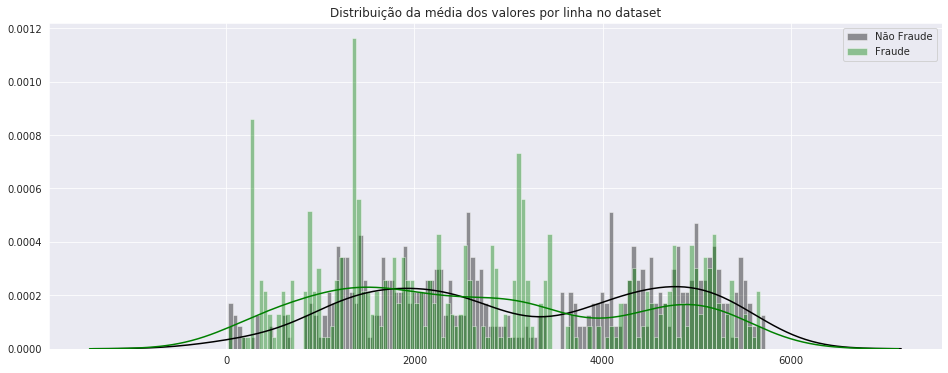

In [17]:
plt.figure(figsize=(16,6))
plt.title("Distribuição da média dos valores por linha no dataset")
sns.distplot(dataset_0[features].mean(axis=1),color="black", kde=True,bins=120, label='Não Fraude')
sns.distplot(dataset_1[features].mean(axis=1),color="green", kde=True,bins=120, label='Fraude')
plt.legend()
plt.show()

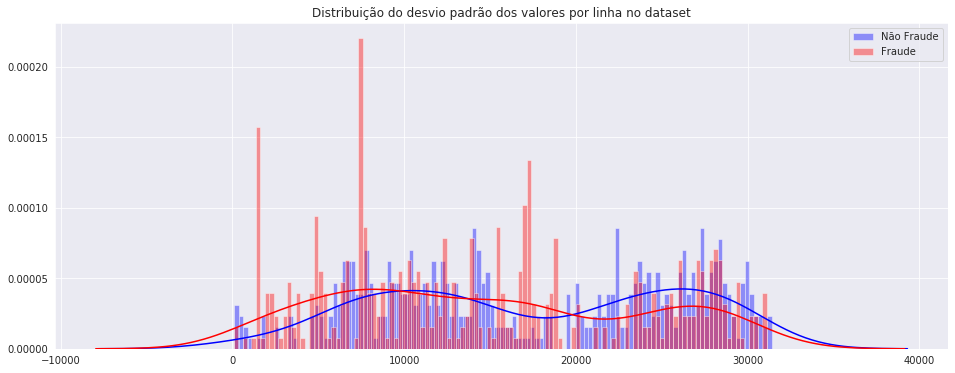

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribuição do desvio padrão dos valores por linha no dataset")
sns.distplot(dataset_0[features].std(axis=1),color="blue", kde=True,bins=120, label='Não Fraude')
sns.distplot(dataset_1[features].std(axis=1),color="red", kde=True,bins=120, label='Fraude')
plt.legend()
plt.show()

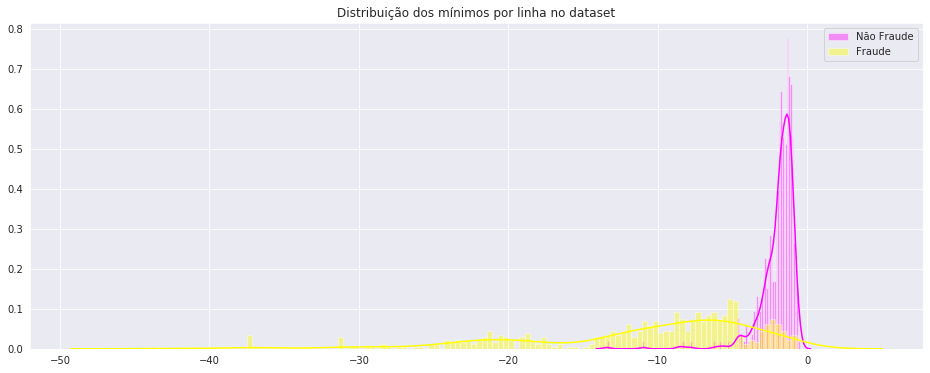

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribuição dos mínimos por linha no dataset")
sns.distplot(dataset_0[features].min(axis=1),color="magenta", kde=True,bins=120, label='Não Fraude')
sns.distplot(dataset_1[features].min(axis=1),color="yellow", kde=True,bins=120, label='Fraude')
plt.legend()
plt.show()

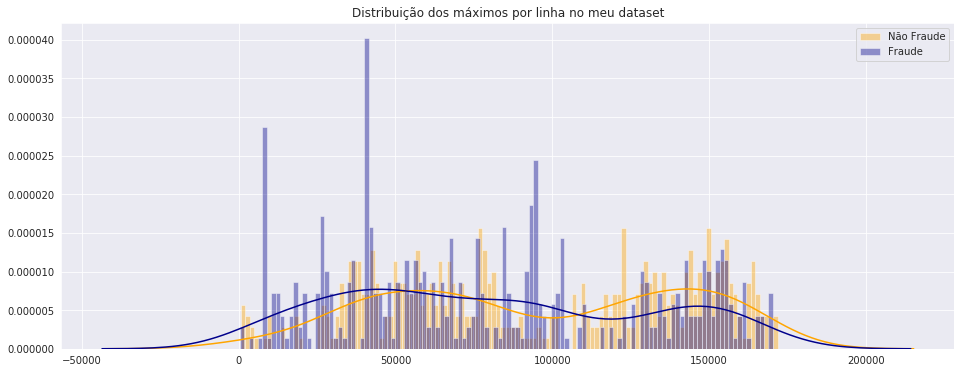

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribuição dos máximos por linha no meu dataset")
sns.distplot(dataset_0[features].max(axis=1),color="orange", kde=True,bins=120, label='Não Fraude')
sns.distplot(dataset_1[features].max(axis=1),color="darkblue", kde=True,bins=120, label='Fraude')
plt.legend()
plt.show()

Vamos verificar agora a correlação entre as features. Esses dados são muito importante para tomada de decisões. Por exemplo, no mercado financeiro, a alocação e combinação de ativos em um portfólio depende muito da correlação que estes possuem entre si.

In [21]:
# criamos uma matriz de correlação entre minhas features
correlations = reduced_dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

# vamos remover as linhas repetidas, já que a correlação entre A e B é a mesma de B com A
correlations = correlations.drop([i for i in range(1,869,2)]).reset_index(drop=True)

Vamos verificar agora as 10 features com maior correlação e as 10 com menor, eliminando elementos repetidos:

In [22]:
print('Top 10 features com maior correlação:\n')
top_10 = correlations.tail(10)
top_10 = top_10.reset_index(drop=True)
top_10

Top 10 features com maior correlação:



,level_0,level_1,0
0,V1,V3,0.882471
1,V1,V7,0.889875
2,V7,V3,0.891757
3,V11,V14,0.895451
4,V12,V16,0.901792
5,V12,V11,0.901918
6,V18,V16,0.909009
7,V18,V17,0.941086
8,V17,V16,0.955257
9,V16,V17,0.955257


In [23]:
print('Top 10 features com menor correlação:\n')
less_10 = correlations.head(10)
less_10

Top 10 features com menor correlação:



,level_0,level_1,0
0,V25,V9,0.000276
1,V22,V23,0.000288
2,V25,V13,0.000560
3,V2,V24,0.001788
4,V2,V26,0.001802
5,V28,V12,0.002087
6,Amount,V22,0.002257
7,V10,V24,0.002696
8,V27,V17,0.002905
9,V15,V25,0.002986


Para que isso fique mais claro, vamos fazer um mapa de calor para as features e deixar isso mais claro:

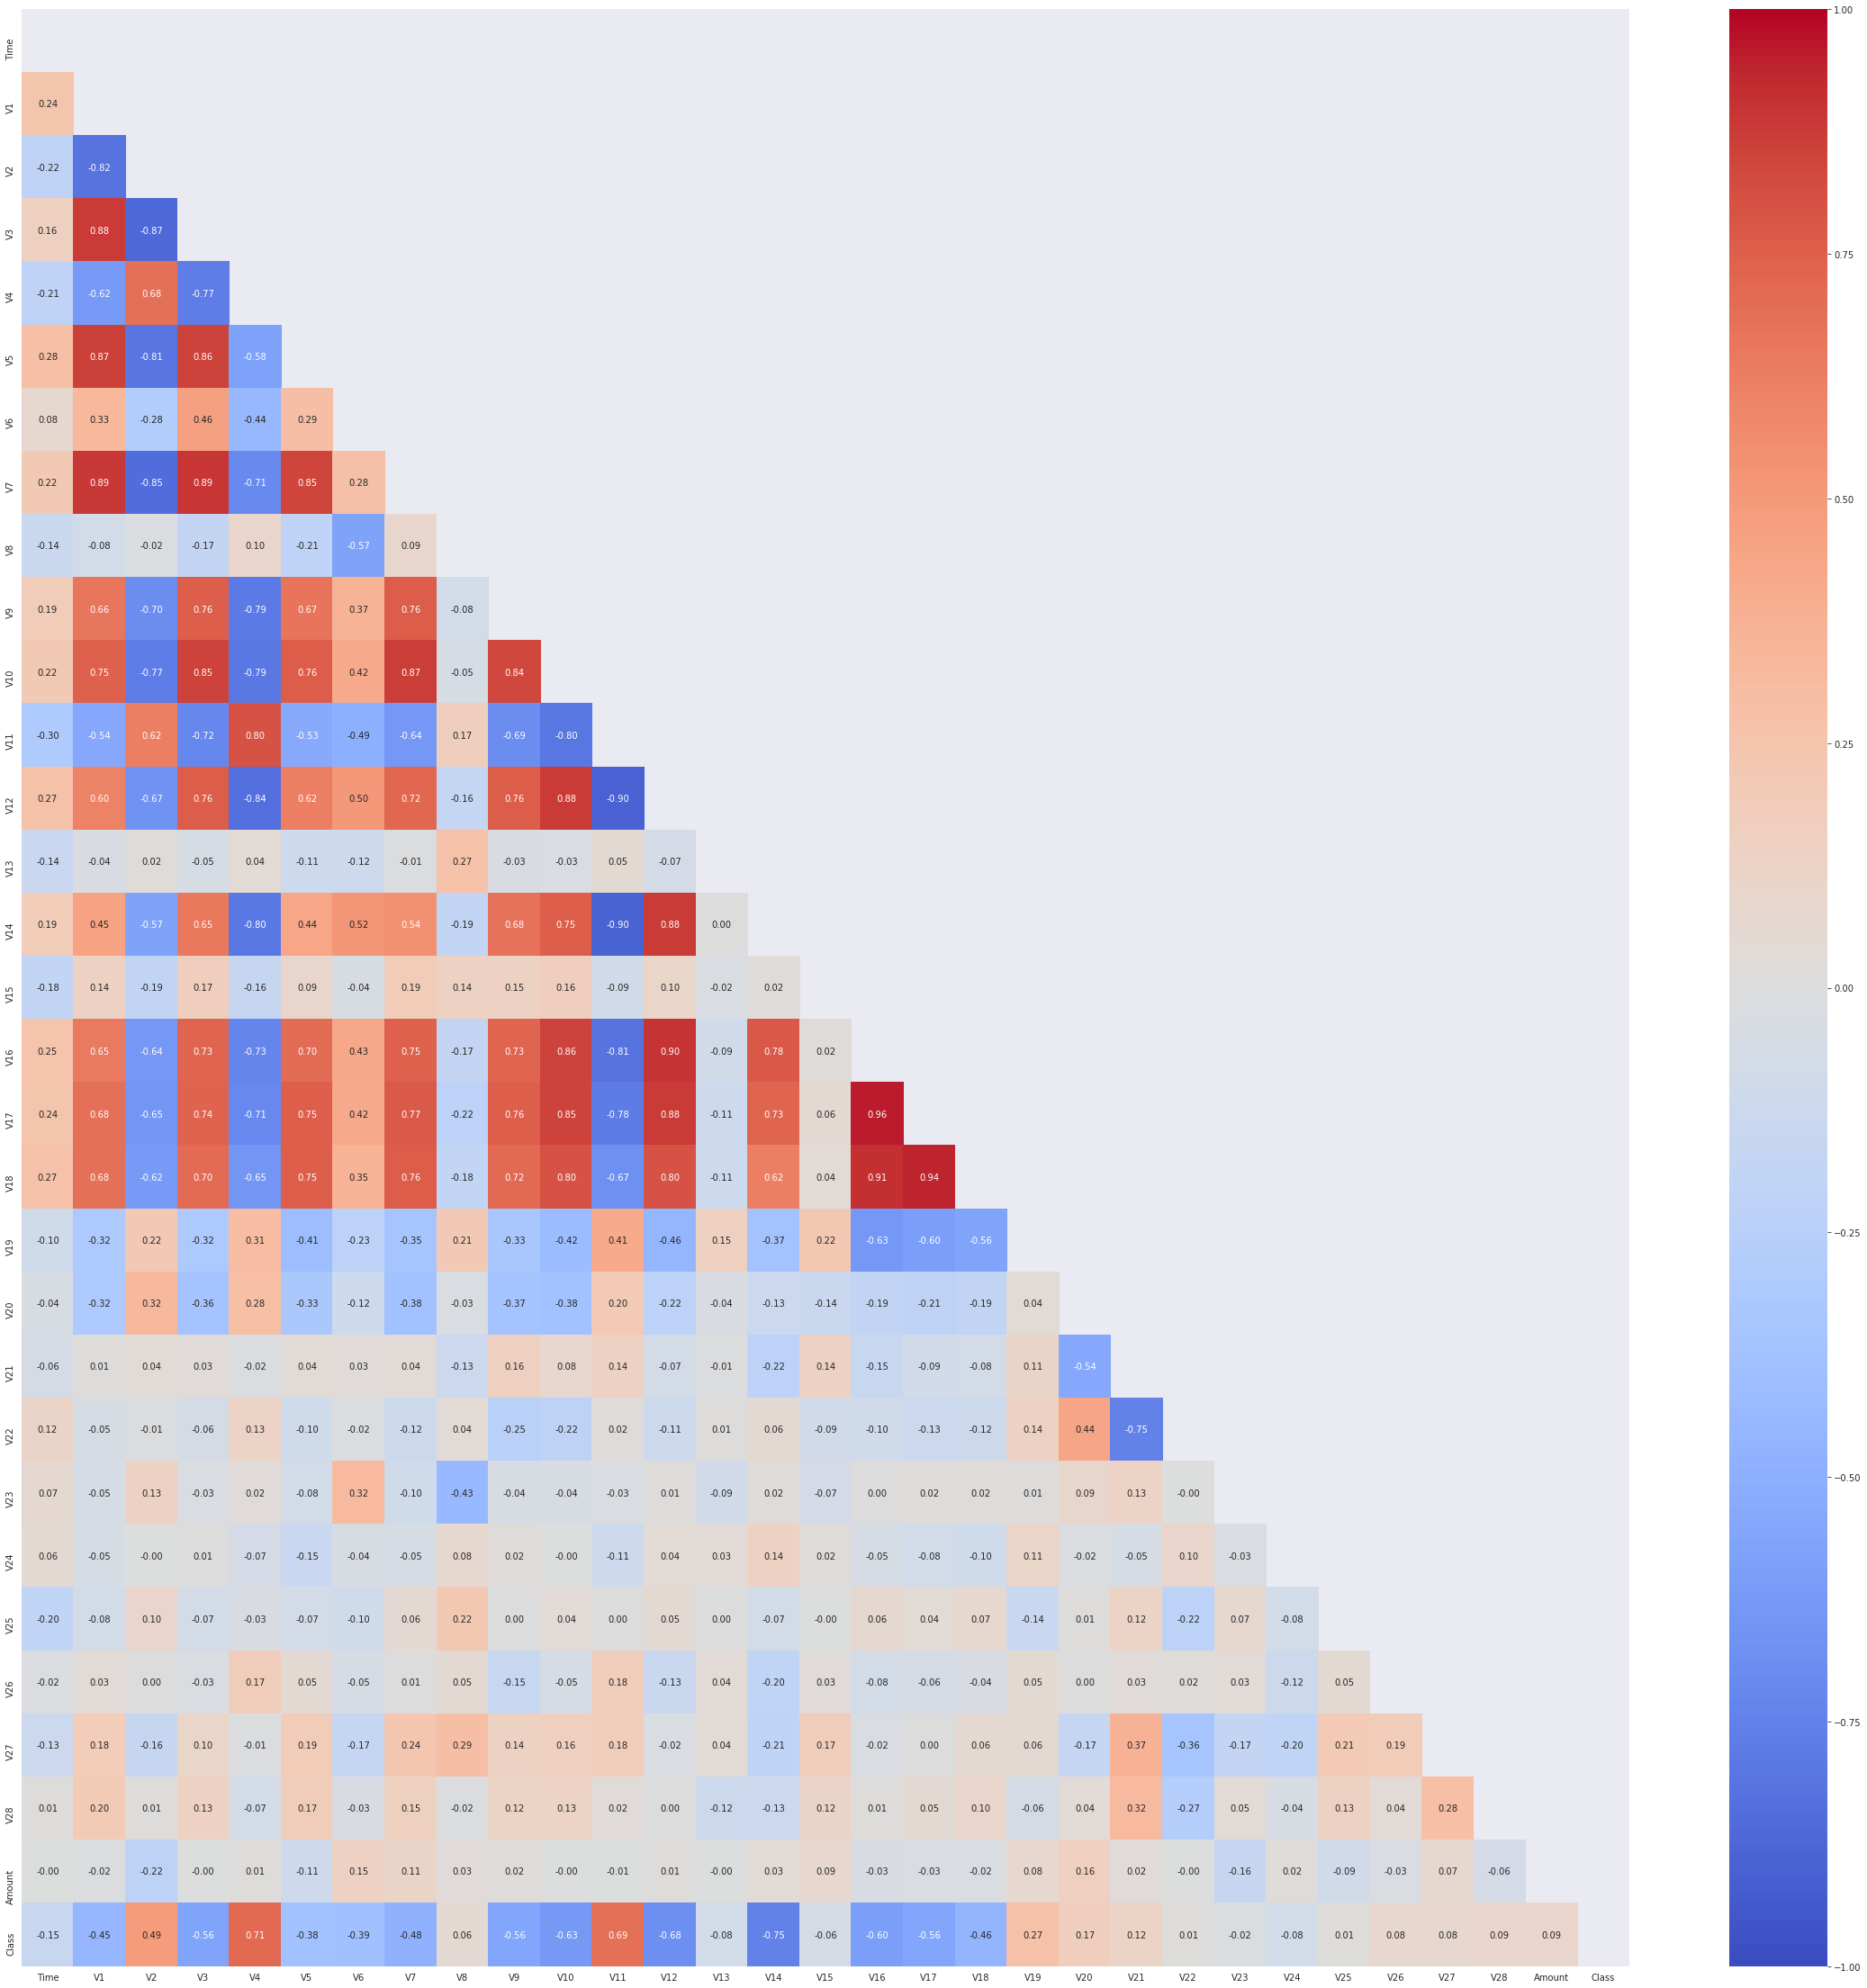

In [24]:
# criando a matriz de correlação
corrMatrix = reduced_dataset.corr()
index = corrMatrix.index
plt.figure(figsize=(40,40))

# aplicando uma máscara, pois, como dissemos, a relação entre A e B é a mesma entre B e A
# portanto, apenas um dos lados da matriz nos interessa, já que ela será simétrica em relação à diagonal principal
# isso facilita a análise do nosso mapa
matrix = np.triu(corrMatrix)
g=sns.heatmap(corrMatrix,annot=True,vmin=-1,vmax=1,center=0,fmt='.2f',cmap='coolwarm',mask=matrix)

Por último, vamos plotar o gráfico de boxplot para nossas variáveis. Ele é muito útil quando queremos identificar outliers em um conjunto de amostras.

In [25]:
def plot_boxplot(df, target, feature_list):
    sns.set_style('darkgrid')

    for feature in feature_list:
        sns.boxplot(x=target, y=feature, data=df)
        plt.show()

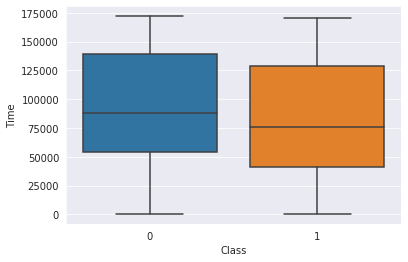

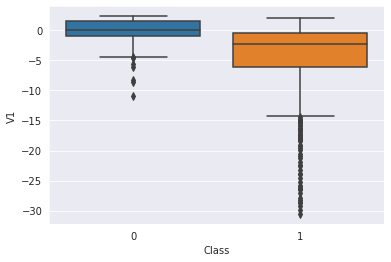

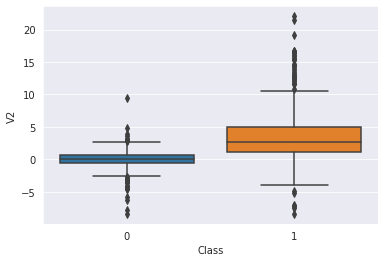

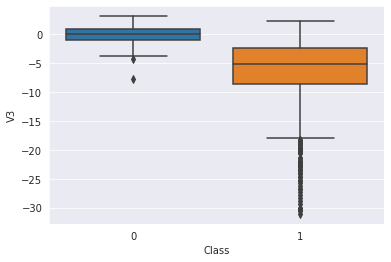

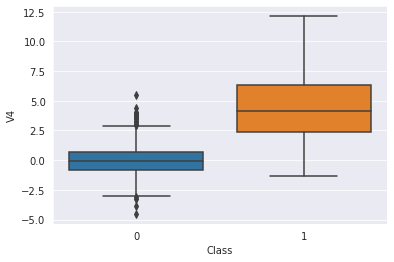

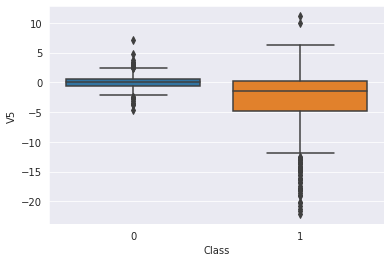

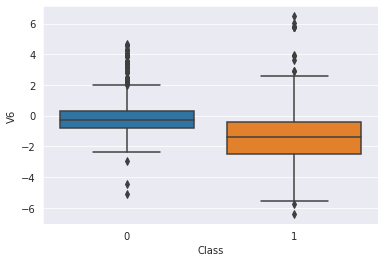

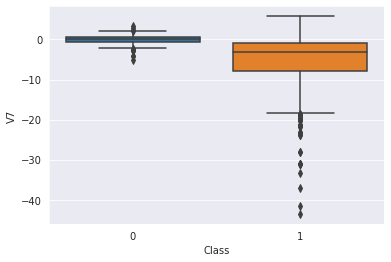

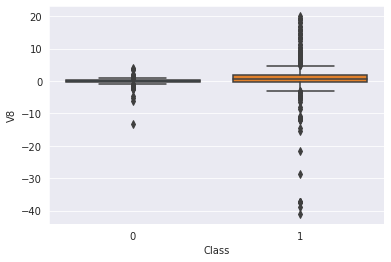

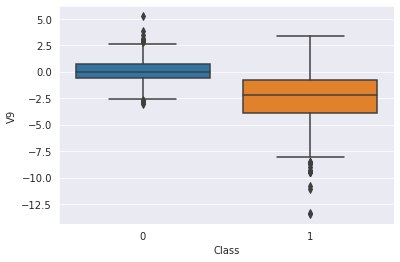

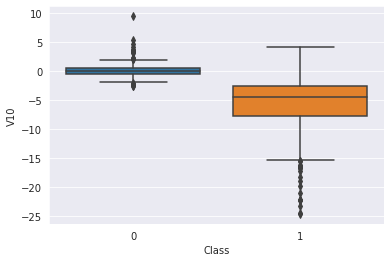

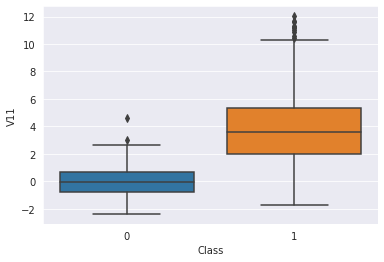

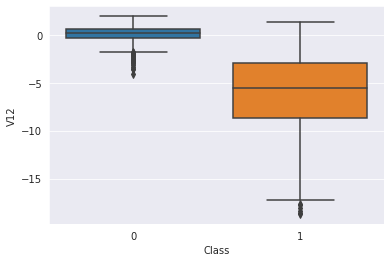

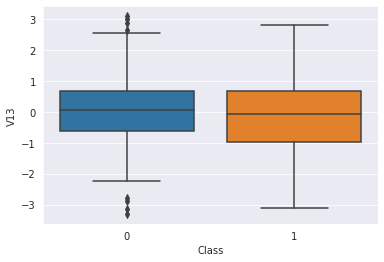

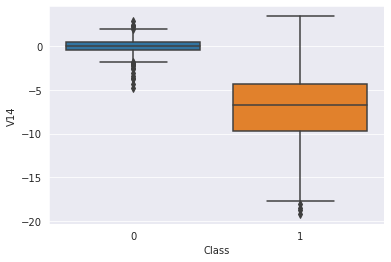

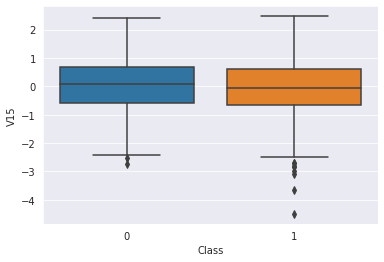

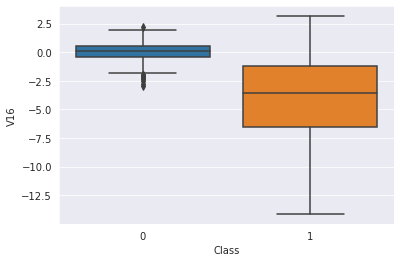

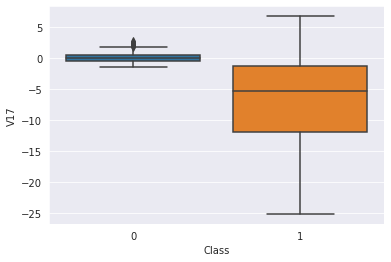

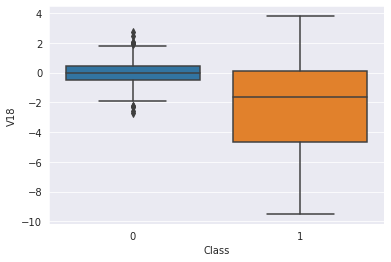

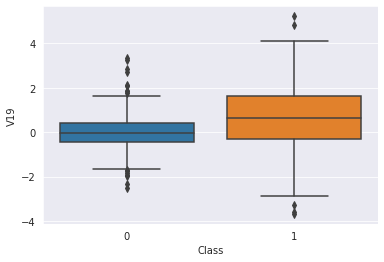

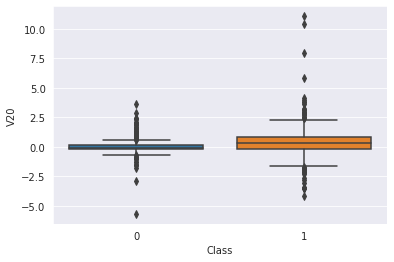

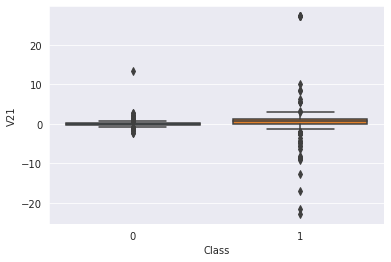

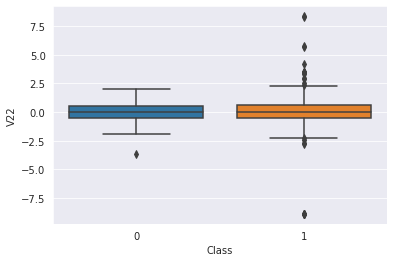

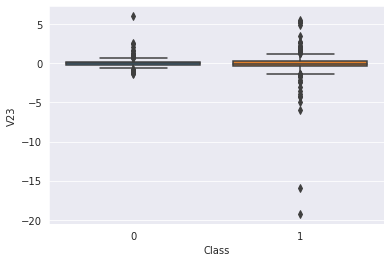

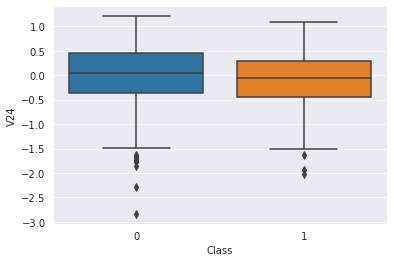

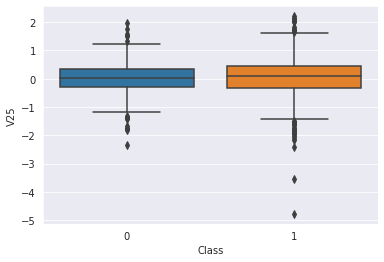

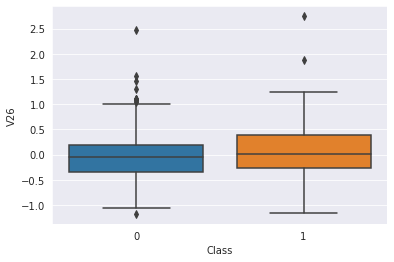

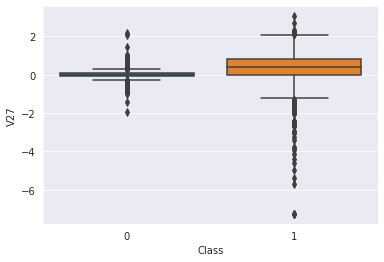

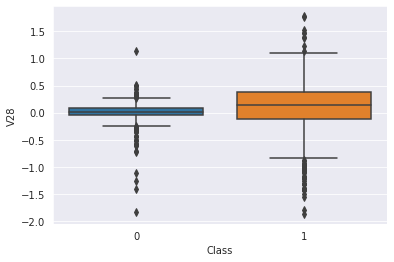

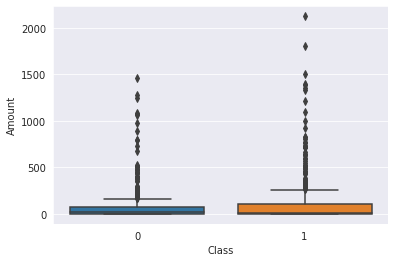

In [26]:
plot_boxplot(reduced_dataset, 'Class', features)

## 2. Treino e Validação do nosso modelo

Vamos iniciar agora algumas previsões.

O primeiro passo é dividirmos nosso dataset em dados de treino e dados de teste que serão usados para validação.

In [27]:
# o pacote para machine learning sci-kit learning já tem uma função com um nome bem intuitivo que fará isso por nós
from sklearn.model_selection import train_test_split

X = reduced_dataset.drop(['Class'], axis=1)
y = reduced_dataset['Class']

"""
é interessante explicar os parâmetros da minha função:
    -X: são minhas variáveis que serão usadas para fazer previsões, ou seja, todos menos Class
    -y: é minha variável de target, ou seja, Class
    -test_size: é a razão em que dividirei meu dataset original, nesse caso, 0.2 significa 20% de dados para validação
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Explicação dos modelos

Inicialmente decidimos treinar vários modelos para passarmos por diversos algoritmos de classificação e compararmos a eficácia de cada um no nosso problema. No fim, escolheremos um apenas para ser tunado, ou seja, lapidar e selecionar melhor seus parâmetros afim de aumentar sua performance.

Faremos uma pausa na programação para explicar detalhadamente o funcionamento de cada algoritmo.

### a. Logistic Regression (Regressão Logística)

Nosso primeiro classificador usará o algoritmo de Regressão Logística. Para entender esse modelo, é importante entendermos o modelo de regressão linear que serve como base para este.

O modelo de regressão linear simples funciona através de relacionar uma ou mais variáveis com outra que deseja-se prever através de uma soma com pesos, acrescida de um elemento independente de variável, ou seja, uma relação linear entre estas. Da seguinte forma:

$$ŷ = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... \theta_nx_n$$

Onde $ŷ$ é a variável que queremos prever e $\theta_i$ é o peso da i-ésima feature $x_i$.

Por exemplo, o lucro de uma lanchonete é calculado através da soma do número de unidades vendidas de cada item no menu multiplicado por seu respectivo preço e subtraído os gastos mensais da lanchonete.

O desafio de treinar um modelo linear como esse é achar os pesos que melhor ajustam o modelo ao que visualizamos na realidade. Existem diversos algoritmos que servem para fazermos esse ajuste e, em geral, eles possuem o mesmo conceito: escolher um métrica de desempenho para o modelo e, a cada nova iteração, com base nessa métrica, atualizar os pesos buscando minimizá-la ou maximizá-la.

Por exemplo, se escolhermos como métrica o Erro Médio Quadrático ou MSE da sigla em inglês Mean Square Error, queremos atualizar os nossos pesos de modo a minimizar esse erro. O MSE é dado por:

$$MSE = \frac{1}{n}\Sigma_{i=1}^{n}{\Big(ŷ_i - y_i\Big)^2}$$

Onde $ŷ_i$ é o output de nosso modelo e $y_i$ é o valor real da minha variável.

Esse é o básico sobre regressão linear, para um estudo mais aprofundado sobre o assunto <a href="https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8">clique aqui.</a> Se quiser entender um pouco mais sobre alguns algoritmos para minimizar esse erro, <a href="https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e">clique aqui</a>.

Uma vez dito isso, já temos o suficiente para explicar o método de Logistic Regression. Este consiste em, após calibrado o modelo de regressão linear, passarmos o meu output ($ŷ$) por uma função que irá retornar a probabilidade de aquele valor corresponder a uma classe ou outra, no nosso caso, 0 ou 1.

A função mais comum de ser usada aqui chama-se <i>sigma function</i>. Dada por:

$$\sigma(ŷ) = \frac{1}{1+e^{-ŷ}}$$

Se plotarmos o gráfico dessa função, teremos:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width=500 height=333>

Perceba que a minha função é limitada entre os valores 0 e 1, portanto, podemos definir um valor a partir do qual haverá a divisão das classes, por convenção, escolhemos 0,5. Ou seja, acima dessa valor será uma classe e, abaixo desse valor, será outra. Se quiser se aprofundar na teoria desse assunto, <a href="https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc">clique aqui</a>.

Ou seja, o nosso modelo de Logistic Regression seria algo como:

<img src="https://www.scielo.br/img/revistas/jmoea/v16n3//2179-1074-jmoea-16-03-0628-gf02.jpg" height="208" width="438">

### b. Decision Tree

Nosso segundo classificador usará o algoritmo de Decision Tree.

Esse algoritmo é bem mais simples e não precisa de nenhuma matemática complexa para entender. O seu nome em si já é bem autoexplicativo. O algoritmo consiste em montar uma árvore binária que imponha, a cada nível da árvore, uma condição sobre a qual dividir os meus dados.

A seguinte imagem representa isso. Pense que você quer decidir para onde sair uma determinada tarde, mas sua decisão depende da resposta a algumas condições:

<img src="https://qph.fs.quoracdn.net/main-qimg-a67d15172966f4115a8b788e57441714">

Ou seja, a sua decisão é dependente da resposta às condições previamente impostas.

Podemos dizer que isso é uma árvore de decisão. A questão que fica é: como realizar a divisão? Qual condição imposta? Para isso, vamos introduzir um novo conceito fundamental:

#### Entropia

Entropia é uma propriedade dos sistemas associada ao grau de organização destes, quanto maior minha entropia, mais desorganizado é meu sistema. Mas não é preciso ser nenhum mestre em estatística ou teoria da informação para entendermos este conceito. A forma como calculamos essa grandeza é bem simples e é:

$$S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

Onde $S$ é a entropia do sistema e $p_i$ é a probabilidade de encontrarmos um elemento pertencente à classe i dentre minhas $N$ amostras. O objetivo da minha árvore de decisão é, a cada nível, reduzir essa entropia, ou seja, aumentar o grau de organização do meu sistema. Sendo assim, o desafio é escolher em que ponto, ou, no nosso caso a partir de qual valor, dividir uma feature de maneira a minimizar essa métrica.

Vamos usar um exemplo para explicar melhor:

Imagine que queiramos tomar a decisão sobre qual a cor de uma bola no seguinte grupo e, para isto, vamos realizar múltiplas divisões entre subgrupos de modo que, no fim, possamos determinar a cor de uma bola dado sua posição no meu conjunto (supondo que haja uma relação entre essas variáveis, cor e posição).

O meu grupo é:

<img src="media/distribuicao_bolas.png">

Por convenção, consideramos a entropia inicial do sistema como sendo $S_0 = 1$.

Imagine que façamos uma primeira divisão em x = 12 (não precisamos nos preocupar com o ponto onde fazer essa divisão, como dissemos, o algoritmo irá buscar esse ponto visando diminuir a entropia, vamos mostrar apenas o procedimento que ele fará).

<img src="media/topic3_entropy_balls2.png">

Vamos agora calcular a entropia em cada subgrupo.

No grupo da esquerda:

$$S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$$

E, no grupo da direita:

$$S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$$

Perceba que conseguimos diminuir a entropia em ambos os grupos, mas com isso também diminuímos o número de amostras em cada grupo. Por tanto, é interessante relacionar essa entropia com o número de amostras no meu grupo e fazemos isso através de uma métrica chamada <i>Ganho de Informação</i>, ou IG, da sigla em inglês Information Gain e é dado por:

$$IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

Onde $Q$ é a minha condição pra realizar o cisalhamento, $N_i$ é o número de amostras em cada subgrupo e $S_i$ a entropia de cada subgrupo. Para meu sistema, por exemplo:

$$IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Daí em diante o meu algoritmo repetirá esse procedimento até reduzir a minha entropia o máximo possível no sistema. Verifique:

<img src="media/topic3_credit_scoring_entropy.png">

### c. Random Forest

O próximo classificador está incluido numa categoria especial de algoritmos de aprendizado chamados <i>Ensemble</i>. Um algoritmo de ensemble basicamente faz previsões usando o output de outros modelos, ou seja, ele faz uma espécie de votação e através desta ele dá um veredito sobre a classe prevista.

A imagem seguinte exemplifica esse conceito:

<img src="media/ensemble_model.png" width=500 height=266>

É importante frisar que estes modelos podem ou não ser iguais, no caso do classificador que vamos exemplificar aqui, você verá que eles são iguais.

O modelo de Random Forest é outro cujo nome nos dá uma dica de seu funcionamento. É importante, para isso, entendermos o motivo de cada um dos nomes:

O Forest (ou Floresta, traduzindo do inglês) diz respeito ao modelo com o qual faremos ensemble, nesse caso, um modelo que já vimos, a Decision Tree. Assim, uma Random Forest nada mais é do que um modelo composto por várias Decision Trees e que dá seu output baseado na previsão de cada uma dessas.

Já o Random vem da maneira como os dados sobre os quais nossas árvores vão tomar decisões são divididos. Ao contrário da maneira usual de treinar o mesmo modelo sobre o mesmo dataset todas as vezes, numa Random Forest as minhas amostras são selecionadas randomicamente por meio de uma estratégia chamada <i>Bootstrap Aggregating</i>, ou bagging, para encurtar.

Ou seja, cada modelo será treinado apenas sobre um conjunto menor do meu dataset. Algumas vantagens dessa estratégia é que, estatisticamente, algumas amostras nunca serão escolhidas e, portanto, podemos usá-la para validar o treinamento. Essas amostras são chamadas de <i>out-of-bag</i>, se quiser ler mais sobre esse método, <a href="https://en.wikipedia.org/wiki/Bootstrap_aggregating">clique aqui</i>.

Agora vamos voltar para a programação.

In [28]:
# o scikit learn já nos provê todos os classificadores, para que não precisemos construí-los
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# o processo de treino é igual para todos
# 1. declaramos o classificador
dt_clf = DecisionTreeClassifier(random_state=42)

# 2. treinamos ele através do método fit
dt_clf.fit(X_train, y_train)

# 3. fazemos previsões com o método predict
y_pred_dt = dt_clf.predict(X_test)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

É interessante estabelecermos métricas para nossos classificadores. Vamos escolher o Recall e a Acurácia, já comentados anteriormente.

Vamos criar uma matriz de confusão, como a apresentada na explicação sobre Recall, que nos permitirá visualizar a distribuição de previsões sobre minhas classes.

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

print('\nAcurácia da Árvore de Decisão:', accuracy_score(y_test, y_pred_dt))
print('Recall da Árvore de Decisão:', recall_score(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print('\nAcurácia da Regressão Logística:', accuracy_score(y_test, y_pred_lr))
print('Recall da Regressão Logística:', recall_score(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)


Acurácia da Árvore de Decisão: 0.8883248730964467
Recall da Árvore de Decisão: 0.8526315789473684

Acurácia da Regressão Logística: 0.9086294416243654
Recall da Regressão Logística: 0.8421052631578947


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [31]:
print('\nAcurácia da Random Forest:', accuracy_score(y_test, y_pred_rf))
print('Recall da Random Forest:', recall_score(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)


Acurácia da Random Forest: 0.9187817258883249
Recall da Random Forest: 0.8526315789473684


Vamos plotar agora as matrizes de confusão (confusion matrix).

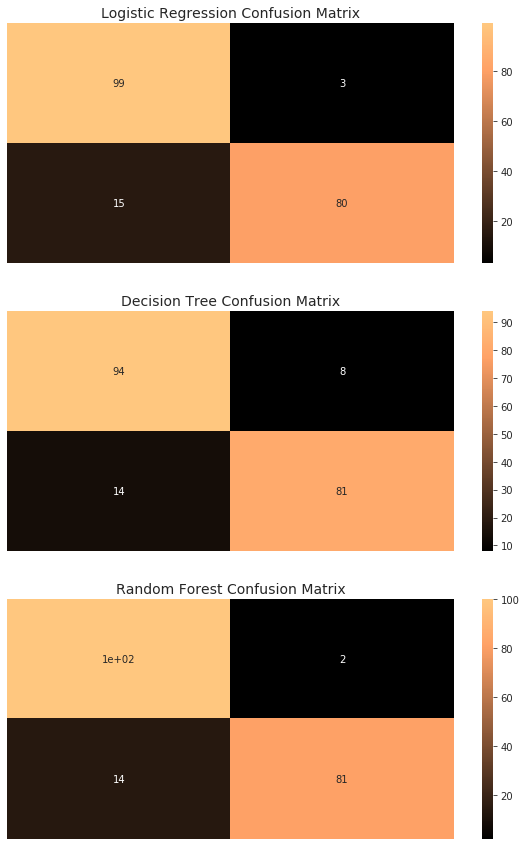

In [32]:
fig, ax = plt.subplots(3, figsize=(10,15))

sns.heatmap(cm_lr, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_dt, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("Decision Tree Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_rf, ax=ax[2], annot=True, cmap=plt.cm.copper)
ax[2].set_title("Random Forest Confusion Matrix", fontsize=14)
ax[2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

O scikit learn nos provê diversas funções para visualizarmos as métricas do meu modelo. Vamos usar uma aqui que nos dá uma visão mais geral sobre os resultados.

In [33]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('Decision Tree:')
print(classification_report(y_test, y_pred_dt))

print('Random Forest:')
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       102
           1       0.96      0.84      0.90        95

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       102
           1       0.91      0.85      0.88        95

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197

Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       102
           1       0.98      0.85      0.91        95

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.92

Uma vez treinados nossos modelos, é interessante vermos o que aconteceria caso ele fosse retreinado outras vezes. Isso nos dá um palpite sobre a acurácia média do meu modelo, imagine, por exemplo, se nossa primeira previsão foi só um golpe de sorte.

Faremos isso através do método de Cross Validation.

Esse método consiste em dividir meu dataset inicial em $N$ subgrupos e treinar cada modelo $N$ vezes. A cada novo treinamento, selecionamos um dos subgrupos para servir como validação enquanto os outros serão usados para treino. Dessa forma, nós teremos $N$ modelos para cada um modelo que tínhamos, o que nos permite visualizar a curva de aprendizado e a distribuição da nossa acurácia.

A imagem a seguir exemplifica o que queremos dizer, nesse caso, dividimos nosso dataset de treino em 10 subgrupos:

<img src="https://www.researchgate.net/profile/Johar_Ashfaque/publication/332370436/figure/fig1/AS:746775958806528@1555056671117/Diagram-of-k-fold-cross-validation-with-k-10-Image-from-Karl-Rosaen-Log.ppm">

In [34]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt_clf, X_train, y_train, scoring='recall', cv=10)
lr_scores = cross_val_score(lr_clf, X_train, y_train, scoring='recall', cv=10)
rf_scores = cross_val_score(rf_clf, X_train, y_train, scoring='recall', cv=10)

Vamos visualizar os resultados agora de duas maneiras.

In [35]:
def show_scores(scores):
    print("Scores:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())

print('\nDecision Tree scores:\n')
show_scores(dt_scores)

print('\nLogistic Regression scores:\n')
show_scores(lr_scores)

print('\nRandom Forest scores:\n')
show_scores(rf_scores)


Decision Tree scores:

Scores: [0.95       0.95       0.825      0.95       0.9        0.875
 0.95       0.84615385 0.87179487 0.92307692]
Média: 0.9041025641025641
Desvio padrão: 0.04506569826113108

Logistic Regression scores:

Scores: [0.925      0.95       0.85       0.975      0.975      0.85
 0.95       0.84615385 0.8974359  0.87179487]
Média: 0.9090384615384617
Desvio padrão: 0.04975899345166473

Random Forest scores:

Scores: [0.925      0.95       0.85       0.975      0.9        0.9
 0.975      0.8974359  0.87179487 0.92307692]
Média: 0.9167307692307693
Desvio padrão: 0.039256161130697215


Vamos plotar esses scores para melhor visualizarmos sua distribuição:

In [36]:
def plot_scores_distribution(scores, label):
    sns.set_style('darkgrid')
    sns.distplot(scores, bins=10, hist=True,label=label)
    plt.title(label)
    plt.show()

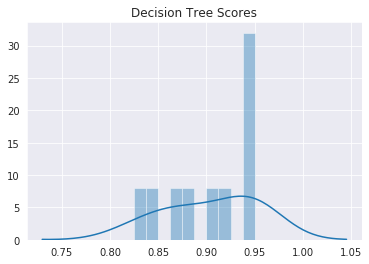

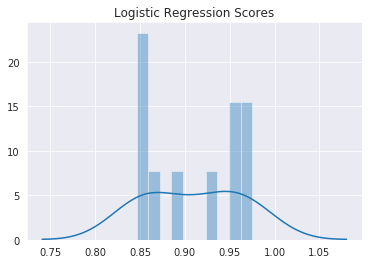

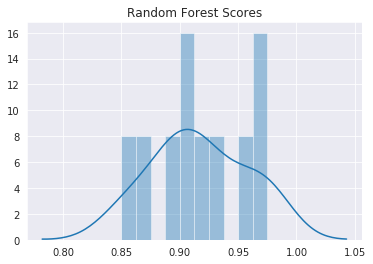

In [37]:
plot_scores_distribution(dt_scores, 'Decision Tree Scores')
plot_scores_distribution(lr_scores, 'Logistic Regression Scores')
plot_scores_distribution(rf_scores, 'Random Forest Scores')

Além de nossos scores, é interessante vermos a curva de aprendizado de nosos modelo. Ela nos dará uma ideia de qual modelo selecionar, baseado na velocidade com que esse aprende.

In [38]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,15), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Decision Tree Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Random Forest Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/ne0/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

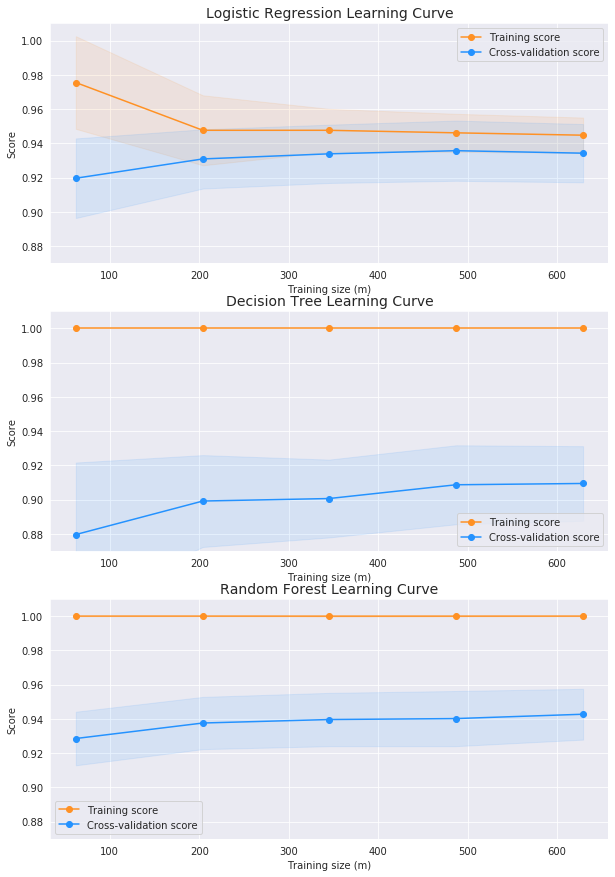

In [39]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(lr_clf, dt_clf, rf_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=-1)

Por último, vamos plotar a curva ROC de nossos modelos.

A curva ROC relaciona o número de falsos positivos do meu modelo com o de verdadeiros positivos. A área abaixo da curva ROC é uma importante métrica para modelos de classificação e nos permite dizer quão bom nosso modelo é em distinguir entre duas classes, essa métrica chama-se AUC, da sigla em inglês Area Under the Curve.

Para termos um parâmetro com o qual comparar nosso modelo, plotamos também a linha que divide nosso quadrante ao meio. Essa bissetriz seria o caso em que o número de falsos positivos e de verdadeiros positivos é igual, ou seja, um modelo que chutasse a classe sem fazer nenhuma previsão. Na teoria, com um número muito alto de amostras, ele acertaria 50% destas. Ou seja, qualquer modelo abaixo dessa bissetriz não é melhor do que um modelo que chutasse resultados.

Para entender mais sobre a teoria por trás da curva ROC e da métrica AUC, <a hrf="https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5">clique aqui</a>.

In [40]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

lr_clf_pred = cross_val_predict(lr_clf, X_train, y_train, cv=5,
                             method="decision_function")

dt_clf_pred = cross_val_predict(dt_clf, X_train, y_train, cv=5)

rf_clf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)

In [41]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, lr_clf_pred))
print('Decision Tree: ', roc_auc_score(y_train, dt_clf_pred))
print('Random Forest: ', roc_auc_score(y_train, rf_clf_pred))

Logistic Regression:  0.9754311180003875
Decision Tree:  0.9238002971000453
Random Forest:  0.9431214880837048


In [42]:
lr_fpr, lr_tpr, lr_thresold = roc_curve(y_train, lr_clf_pred)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_train, dt_clf_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_clf_pred)


def graph_roc_curve_multiple(lr_fpr, lr_tpr, dt_fpr, dt_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, lr_clf_pred)))
    plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, dt_clf_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_clf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Falsos Positivos', fontsize=16)
    plt.ylabel('Verdadeiros Positivos', fontsize=16)
    plt.annotate('Mínimo ROC Score de 50% \n (O mínimo score desejável)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    

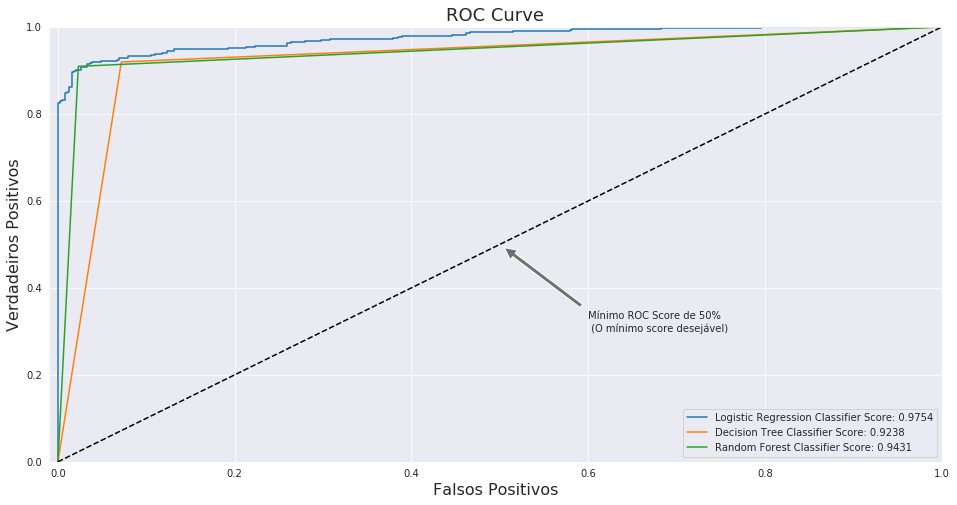

In [43]:
graph_roc_curve_multiple(lr_fpr, lr_tpr, dt_fpr, dt_tpr, rf_fpr, rf_tpr)
plt.show()

## 3. Tunando o modelo

O processo de tunar um modelo, como dito, consiste de fazer a escolha dos melhores hiperparâmetros visando maximizar nossas métricas. Como esse processo pode ser repetitivo, escolheremos apenas um modelo para treinar. Tendo em vista que os outros seriam um processo semelhante e no fim vamos escolher apenas para criarmos uma aplicação com este.

O modelo escolhido será o Random Forest.

Para tunarmos o modelo, usaremos uma função do scikit learn que realiza o <i>Random Search</i>.

Random Search é uma estratégia que consiste em passarmos uma range de possíveis valores para os parâmetros do meu modelo e selecionar aquele conjunto de parâmetros que performar melhor sobre meus dados.

Imagine que faríamos, por exemplo, um for sobre cada conjunto de possíveis parâmetros do meu modelo e salvamos a acurácia de cada um desses modelos. No fim, escolhemos aquele que possuir a melhor acurácia.

Esse processo pode ser demorado e exige muito poder computacional, o Random Search é uma estratégia alternativa que produz resultados satisfatórios com um tempo muito menor, já que ele seleciona parâmetros randomicamente a cada nova iteração, mantendo alguns deles e alterando outros.

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# temos que criar um dicionário com os parâmetros e a range de valores para cada um
param_distribs = {
        # este parâmetro regula o número de árvores na minha floresta
        'n_estimators': randint(low=1, high=200),
    
        # este parâmetro determina o número de features considerada em cada split
        'max_features': randint(low=1, high=8),
    
        # o critério é a condição para realizarmos um split, como a entropia que vimos
        'criterion': ['gini', 'entropy'],
    
        # podemos dizer se queremos ativar ou não o bootstrap agreggating
        'bootstrap': [True, False],
    }

rf_clf = RandomForestClassifier(random_state=42)
# semelhante a como criamos um classificador, o random search é parecido, mas passamos como parâmetro uma lista
# ou dicionário de parâmetros
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, y_train)
print('Concluído!')

Concluído!


O atributo best_estimator_ da nossa função nos permite pegarmos os melhores parâmetros e aplicarmos eles a um classificador. Nesse caso, final_clf, que será o classificador que usaremos em nossa aplicação.

In [45]:
final_clf = rnd_search.best_estimator_
final_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Como de praxe, vamos visualizar algumas métricas do nosso classificador.

In [46]:
print('Final Random Forest Classifer:\n')
print(classification_report(y_test, final_clf.predict(X_test)))

Final Random Forest Classifer:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       102
           1       1.00      0.84      0.91        95

    accuracy                           0.92       197
   macro avg       0.94      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



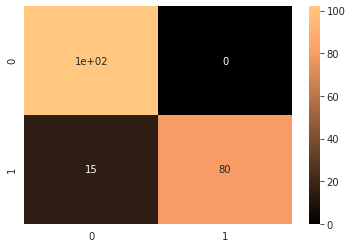

In [47]:
cm_final = confusion_matrix(y_test, final_clf.predict(X_test))
sns.heatmap(cm_final, annot=True, cmap=plt.cm.copper)
plt.show()

Algumas vezes, mudanças substanciais não são notáveis após tunar o modelo. Isso se dá pois, olhando nossos modelos anteriormente, eles já performavam muito bem sobre nossos dados. Isso é algo que deve ser considerado, pois, numa empresa, tempo e poder computacional livre são recursos limitados. Saber se tunar um modelo é necessário ou não pode poupar muito de um funcionário para outra atividade.

Mas aqui, nosso propósito é aprender novas técnicas que podem ser aplicadas em outros modelos.

Vamos visualizar a importância de cada feature para o output final do meu modelo.

Novamente, em um ambiente empresarial, você pode estar interessado em focar seus recursos em um serviço ou outro, mas sem perder tanto de sua base de consumidores. Por isso, saber a importância de cada feature para nosso resultado é tão importante, ela nos diz qual feature não podemos deixar de considerar na hora de classificar uma amostra.

In [48]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = features
feature_importance_df["Importance"] = final_clf.feature_importances_
feature_importance_df = feature_importance_df.sort_values(by="Importance").reset_index(drop=True)
feature_importance_df

,Feature,Importance
0,V24,0.005986
1,V22,0.006901
2,Time,0.007648
3,V13,0.008258
4,V15,0.008452
5,V26,0.008623
6,V25,0.008639
7,V23,0.010097
8,V20,0.012824
9,V5,0.012940


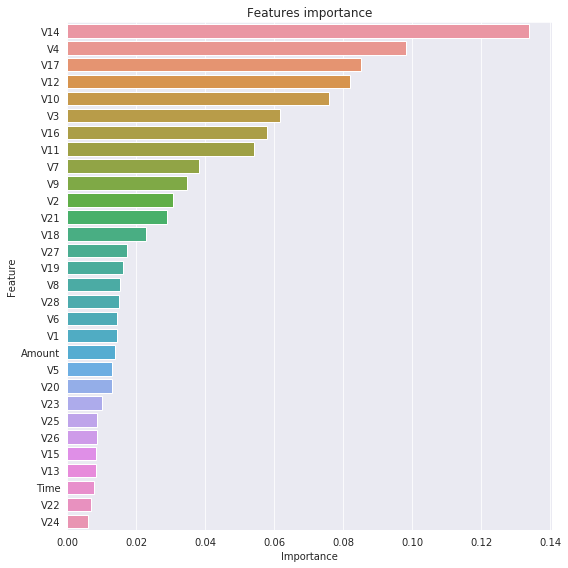

In [49]:
cols = (feature_importance_df[["Feature", "Importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="Importance", ascending=False).index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(8,8))
sns.barplot(x="Importance", y="Feature", data=best_features.sort_values(by="Importance",ascending=False))
plt.title('Features importance')
plt.tight_layout()

Por fim, é interessante vermos como nosso modelo está tomando suas decisões. Lembre-se que a Random Forest é um conjunto de árvores, abaixo vamos plotar apenas uma, sabendo que as outras teriam uma estrutura parecida.

As células abaixo estão comentadas pois a imagem já foi gerada.

In [50]:
# import pydotplus
# from sklearn.tree import export_graphviz

# def tree_graph_to_png(tree, feature_names, png_file_to_save):
#     tree_str = export_graphviz(tree, feature_names=feature_names, 
#                                      filled=True, out_file=None)
#     graph = pydotplus.graph_from_dot_data(tree_str)  
#     graph.write_png(png_file_to_save)

In [51]:
# tree_graph_to_png(tree=final_clf.estimators_[0], feature_names=features, 
#                   png_file_to_save='estimator0.png')

<img src="media/estimator0.png">

----

## 4. Referências:

- https://scikit-learn.org/stable/user_guide.html
- https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
- https://mlcourse.ai/articles/topic3-dt-knn/
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, by Aurélien Géron

---